In [193]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pl

import pandas as pd
import matplotlib.image as mpimg
import glob
import re
import scipy
import sys
sys.path.append('../')
from functions import *

In [2]:
def curvature(x_path, y_path,scale):
    r, xcs, ycs = [],[],[]
    num_points = len(x_path)

    for i in range(int(scale),int(num_points-scale)):
        x1 = x_path[i-int(scale)]
        y1 = y_path[i-int(scale)]
        x2 = x_path[i]
        y2 = y_path[i]
        x3 = x_path[i+int(scale)]
        y3 = y_path[i+int(scale)]
        
        ma = (y2 - y1)/(x2 - x1)
        mb = (y3 - y2)/(x3 - x2)
        xc = (ma*mb*(y1 - y3) + mb*(x1 + x2) - ma*(x2 + x3))/(2*(mb - ma))
        yc = -1/ma*(xc - (x1 + x2)/2) + (y1 + y2)/2

        if ma == mb:
            rad = float(np.inf)
        else:
            rad = float(np.hypot(xc - x1, yc - y1))

        nv1 = np.cross(np.array([x2 - x1, y2 - y1, 0]), np.array([0 ,0, 1]))
        nv2 = np.cross(np.array([x3 - x2, y3 - y2, 0]), np.array([0 ,0, 1]))
        nv = np.average([nv1, nv2], axis = 0)
        align = -np.sign(np.dot(nv[0:2], np.array([x2 - xc, y2 - yc])))

        if rad == 0:
            r.append(np.nan)
        else:
            r.append(align * 1./rad)
            
        xcs.append(xc)
        ycs.append(yc)

    return r

def alpha_to_rgb(color, alpha):
    """
    Calculates the RGB code of a color with given transparency.
    
    Inputs
    ------
    color : Specified color in HEX representation.
    alpha : Number in the [0,1] interval.
    
    Outputs
    -------
    rgb_new : RGB number triplet of the color with transparency `alpha`.
    """
    rgba = np.array(colors.to_rgba(color))
    rgb_new = alpha*(rgba[0:3]-1)+1
    return rgb_new

In [3]:
save_images = False

In [4]:
df_Rxzero = pd.read_pickle("noforce_Fy_Mp_only.pkl")
df_Ryzero = pd.read_pickle("noforce_Fx_only.pkl")
df = pd.read_pickle("noforce_Fx_Fy_Mp.pkl")
df_Mpzero_Mknonzero = pd.read_pickle("noforce_Fx_Fy_Mk.pkl")
df_Rxzero_Mknonzero = pd.read_pickle("noforce_Fy_Mk_only.pkl")

M0_arr = df["M0 (mcmc)"].values
Rx_arr = df["Rx (mcmc)"].values
PP_K_angle_arr = df["PP-K angle (deg)"].values
L_arr = df["L"].values
PP_dist_arr = df["PP distance"].values


ValueError: unsupported pickle protocol: 5

In [13]:
print("M0:", M0_arr.mean(), M0_arr.std()/np.sqrt(len(M0_arr)))
print("Rx:",Rx_arr.mean(), Rx_arr.std()/np.sqrt(len(Rx_arr)))
print("PPdist:",df["PP distance"].unique().mean(), \
      df["PP distance"].unique().std()/np.sqrt(len(df["PP distance"].unique())))

M0: 0.12045658907364516 0.011367277465590724
Rx: 0.07050817232188711 0.023607582179590476
PPdist: 16.27588930853112 0.7781150108339138


In [14]:
div = L_arr/PP_dist_arr
print(div.min())
print(div.max())
print(PP_dist_arr.mean(),PP_dist_arr.min(),PP_dist_arr.max())
len(df["PP distance"].unique()),len(df["PP distance"])

0.25416692520461953
0.6451423472965789
16.884745159204023 12.401117893157858 28.035


(26, 83)

/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/838088799.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar(angles_avg[i], Mp_means[i], yerr = Mp_sem[i], elinewidth = 3, fmt = '_', \
/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/838088799.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar(angles_avg[i], Mp_means[i], yerr = Mp_sem[i], elinewidth = 3, fmt = '_', \
/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/838088799.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar(angles_avg[i], Mp_means[i], yerr = Mp_sem[i], elinewidth = 3, fmt = '_', \
/var/folde

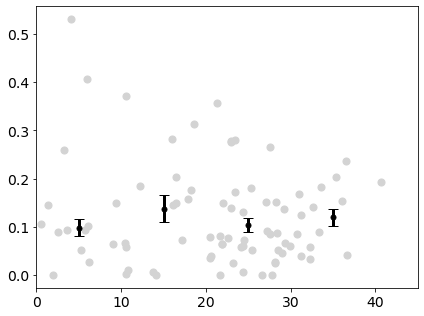

In [15]:
fig = plt.figure(figsize=(6, 4.5))
# angles_low = np.array([0, 15, 25, 35])
# angles_high = np.array([10, 25, 35, 45])
angles_low = np.array([0, 10, 20, 30])
angles_high = np.array([10, 20, 30, 40])
angles_avg = 0.5*(angles_low+angles_high)
n_angles = len(angles_low)

Mp_subsets = []
Mp_means = np.zeros(n_angles)
Mp_std = np.zeros(n_angles)
Mp_sem = np.zeros(n_angles)
for i in range(n_angles):
    Mp_subset = M0_arr[(PP_K_angle_arr >= angles_low[i]) & (PP_K_angle_arr < angles_high[i])]
    L_subset = L_arr[(PP_K_angle_arr >= angles_low[i]) & (PP_K_angle_arr < angles_high[i])]
    if i ==0:
        Mp_subset = np.delete(Mp_subset, 3)
        Mp_subset = np.delete(Mp_subset, 2)
    
    Mp_subsets.append(Mp_subset)
    Mp_means[i] = np.mean(Mp_subset)
    Mp_std[i] = np.std(Mp_subset)
    Mp_sem[i] = np.std(Mp_subset)/np.sqrt(len(Mp_subset))
        
# M0_arr = np.delete(M0_arr, 17)
# M0_arr = np.delete(M0_arr, 15)
# PP_K_angle_arr = np.delete(PP_K_angle_arr, 17)
# PP_K_angle_arr = np.delete(PP_K_angle_arr, 15)

plt.scatter(PP_K_angle_arr, M0_arr, 50, color='lightgray')

for i in range(n_angles):
    plt.errorbar(angles_avg[i], Mp_means[i], yerr = Mp_sem[i], elinewidth = 3, fmt = '_', \
                 color = 'k', marker = '.', markersize = 10, capsize = 5, capthick = 1, zorder = 10)
    
labels = []
for i in range(n_angles):
    labels.append(str(angles_low[i]) + '-' + str(angles_high[i]))

# plt.xlabel(r'rotation angle, $\alpha_{\rm PK}$ [degrees]', fontsize = 14)
# plt.ylabel(r'moment at the pole, $M_p$ [pN$\times$μm]', fontsize = 14)
plt.xticks([0,10,20,30,40], fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,45)
plt.tight_layout()
# if save_images:
plt.savefig('fig_outputs/Mp_vs_rotation_angle.pdf')

/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/2723527289.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar(angles_avg[i], Rx_means[i], yerr = Rx_sem[i], elinewidth = 3, fmt = '_', \
/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/2723527289.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar(angles_avg[i], Rx_means[i], yerr = Rx_sem[i], elinewidth = 3, fmt = '_', \
/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/2723527289.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar(angles_avg[i], Rx_means[i], yerr = Rx_sem[i], elinewidth = 3, fmt = '_', \
/var/fo

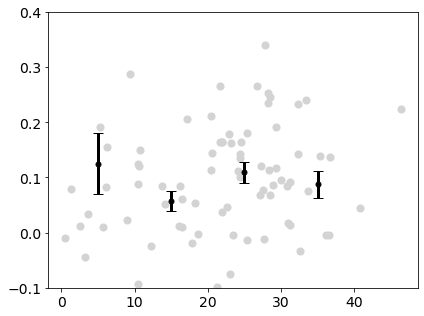

In [16]:
PP_K_angle_arr = df["PP-K angle (deg)"].values
fig = plt.figure(figsize=(6, 4.5))
# angles_low = np.array([0, 15, 25, 35])
# angles_high = np.array([10, 25, 35, 45])
angles_low = np.array([0, 10, 20, 30])
angles_high = np.array([10, 20, 30, 40])
angles_avg = 0.5*(angles_low+angles_high)
n_angles = len(angles_low)

Rx_subsets = []
Rx_means = np.zeros(n_angles)
Rx_std = np.zeros(n_angles)
Rx_sem = np.zeros(n_angles)
for i in range(n_angles):
    Rx_subset = Rx_arr[(PP_K_angle_arr >= angles_low[i]) & (PP_K_angle_arr < angles_high[i])]
    if i ==0:
        Rx_subset = np.delete(Rx_subset, 3)
        Rx_subset = np.delete(Rx_subset, 2)
    Rx_subsets.append(Rx_subset)
    Rx_means[i] = np.mean(Rx_subset)
    Rx_std[i] = np.std(Rx_subset)
    Rx_sem[i] = np.std(Rx_subset)/np.sqrt(len(Rx_subset))

# Rx_arr = np.delete(Rx_arr, 17)
# Rx_arr = np.delete(Rx_arr, 15)
# PP_K_angle_arr = np.delete(PP_K_angle_arr, 17)
# PP_K_angle_arr = np.delete(PP_K_angle_arr, 15)

plt.scatter(PP_K_angle_arr, Rx_arr, 50, color='lightgray')
for i in range(n_angles):
    plt.errorbar(angles_avg[i], Rx_means[i], yerr = Rx_sem[i], elinewidth = 3, fmt = '_', \
                 color = 'k', marker = '.', markersize = 10, capsize = 5, capthick = 1, zorder = 10)
    
labels = []
for i in range(n_angles):
    labels.append(str(angles_low[i]) + '-' + str(angles_high[i]))

# plt.xlabel(r'rotation angle, $\alpha_{\rm PK}$ [degrees]', fontsize = 14)
# plt.ylabel(r'moment at the pole, $M_p$ [pN$\times$μm]', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.1,0.4)
plt.tight_layout()
# if save_images:
plt.savefig('fig_outputs/Rx_vs_rotation_angle.pdf')

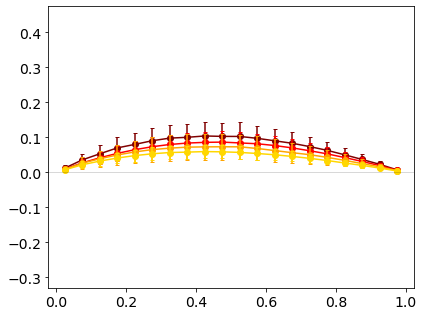

In [19]:
nbins = 20

colors=["gold", "orange", "red", "maroon", "black"]
fig = plt.figure(figsize=(6, 4.5))

for i in range(n_angles):
    
    df_angle = df[(df['PP-K angle (deg)'] >= angles_low[i]) & (df['PP-K angle (deg)'] <= angles_high[i])]
    
    rot_angle = np.mean([angles_low[i], angles_high[i]])
    
    x_mod_ls, y_mod_ls = [], []
    for n, row in df_angle.iterrows():

        x_mod = row["x (mcmc)"]
        y_mod = row["y (mcmc)"]
        L = row["L"]
        
#         x_rot, y_rot = rotate(x_mod, y_mod, np.radians(-rot_angle))
#         x_rot_scale = x_rot/L
#         y_rot_scale = y_rot/L

        x_rot, y_rot = rotate(x_mod, y_mod, np.radians(0))
        x_rot_scale = x_rot/L
        y_rot_scale = y_rot/L
        
        x_mod_ls.append(x_rot_scale)
        y_mod_ls.append(y_rot_scale)
        
        
#         plt.plot(x_rot_scale, y_rot_scale, color=colors[i], ls='--', alpha=0.2)
        
    x, y = [], []
    [x.extend(el) for el in x_mod_ls]
    [y.extend(el) for el in y_mod_ls]
    x = np.array(x)
    y = np.array(y)
    
    n, _ = np.histogram(x, bins=nbins)
    
    sy, _ = np.histogram(x, bins=nbins, weights=y)
    sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
    mean = sy / n
    std = np.sqrt(sy2/n - mean*mean)
    plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt = 'o-', capsize=2,color=colors[i],zorder=1-i) #colors[i])
    
plt.axhline(y=0, color="k", lw=0.5, alpha=0.3)
plt.axis("equal")
# plt.xlabel('normalized position \nparallel to the pole-pole axis', fontsize=14)
# plt.ylabel('normalized position \nnormal to the pole-pole axis', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
if save_images:
    plt.savefig('fig_outputs/average_profiles_collapsed.pdf')

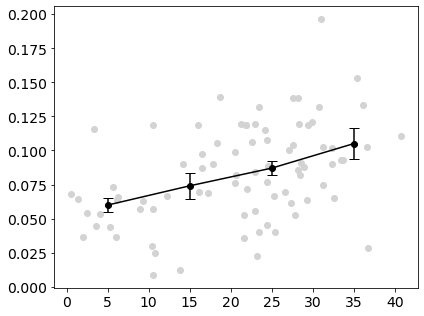

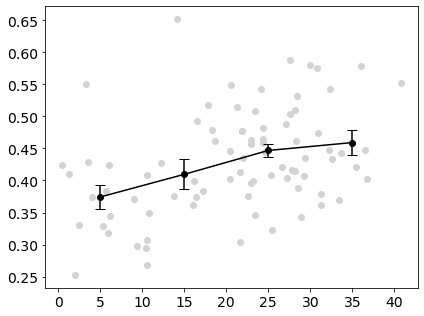

In [20]:
angles_low = np.array([0, 10, 20, 30])
angles_high = np.array([10, 20, 30, 45])
angles_avg = 0.5*(angles_low+angles_high)
n_angles = len(angles_low)

nbins = 20

colors=["gold", "orange", "red", "maroon", "black"]
maxy,angles = [],[]
L_ls,PPdist_ls,Lc_ls, ratio_ls = [],[],[],[]
Lc_mean, ymax_mean,ratio_mean,ratio_sem = [],[],[],[]
for i in range(n_angles):
    
    df_angle = df[(df['PP-K angle (deg)'] >= angles_low[i]) & (df['PP-K angle (deg)'] <= angles_high[i])]
    
    rot_angle = np.mean([angles_low[i], angles_high[i]])
#     print(rot_angle,df_angle["L"].mean(),df_angle["L"].median())
    
    x_mod_ls, y_mod_ls = [], []
    Lc_temp,maxy_temp,ratio_temp = [],[],[]
    for n, row in df_angle.iterrows():

        x_mod = row["x (mcmc)"]
        y_mod = row["y (mcmc)"]
        s,L_contour = contour_fn(x_mod,y_mod)
        L = row["L"]
        PP_dist = row["PP distance"]
        M0 = row["M0 (mcmc)"]
        Rx = row["Rx (mcmc)"]
        angle = row["PP-K angle (deg)"]
        ratio = L_contour/PP_dist
        x_rot, y_rot = rotate(x_mod, y_mod, np.radians(0))
        x_rot_scale = x_rot/L
        y_rot_scale = y_rot/L
        r = curvature(x_rot_scale,y_rot_scale,10)
        if ratio == 0.5506617009932508 and angle == 3.270438936347056:
            continue
#         print(L_contour/PP_dist,angle)
        angles.append(angle)
        maxy.append(max(y_rot_scale))
        L_ls.append(L)
        Lc_ls.append(L_contour)
        PPdist_ls.append(PP_dist)
        x_mod_ls.append(x_rot_scale)
        y_mod_ls.append(y_rot_scale)
        peak_val = np.max(y_rot_scale)
        peak_loc = x_rot_scale[y_rot_scale ==y_rot_scale.max()]
        Lc_temp.append(L_contour)
        ratio_ls.append(ratio)
        ratio_temp.append(L_contour/PP_dist)
        maxy_temp.append(max(y_rot_scale))
    Lc_mean.append(np.mean(Lc_temp))
    ymax_mean.append(np.mean(maxy_temp))
    ratio_mean.append(np.mean(ratio_temp))
    ratio_sem.append(np.std(ratio_temp)/np.sqrt(len(ratio_temp)))

angles = np.array(angles)
ratio = np.array(ratio)
maxy = np.array(maxy)
Lc_ls = np.array(Lc_ls) 
L_ls = np.array(L_ls)
PPdist_ls = np.array(PPdist_ls)
    
fig = plt.figure(figsize=(6, 4.5))
x = angles
y = maxy
plt.scatter(x, y, color='lightgray')

nbins = np.array([0,10,20,30,40])
n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std/np.sqrt(n), fmt='o-',color='k',capsize=5,zorder=10)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("fig_outputs/maxy_vs_kfibangle.pdf")
    
plt.show()

fig = plt.figure(figsize=(6, 4.5))
x = angles
y = Lc_ls/PPdist_ls
# x = np.delete(x, 17)
# y = np.delete(y, 15)

plt.scatter(x, y, color='lightgray')

nbins = np.array([0,10,20,30,45])
n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plt.errorbar([5,15,25,35], mean, yerr=std/np.sqrt(n), fmt='o-',color='k',capsize=5,zorder=10)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("fig_outputs/length_vs_kfibangle.pdf")
plt.show()



In [21]:
print("Lc/PP mean:", ratio_mean)
print("Lc/PP sem:", ratio_sem)


Lc/PP mean: [0.37418483467824054, 0.4095665655612051, 0.44683338657888166, 0.45911862667146547]
Lc/PP sem: [0.018787386821119658, 0.023171745004772627, 0.01074419578046872, 0.019361728240386393]


/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/68828340.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar([0,1],[np.mean(var1),np.mean(var2)],\


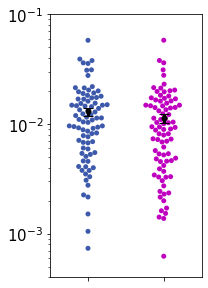

mann-whitney U test
0.1571908237770554


In [52]:
df_MkMpnonzero = pd.read_pickle("noforce_unconstrained.pkl")
df = pd.read_pickle("noforce_Fx_Fy_Mp.pkl")

RMSE_Mkzero_ls = df["RMSE (mcmc)"].values
RMSE_MkMpnonzero_ls = df_MkMpnonzero["RMSE (mcmc)"].values

plt.figure(figsize=(3,4))
seed = 4
np.random.seed(seed)

var1 = RMSE_Mkzero_ls
var2 = RMSE_MkMpnonzero_ls

plt.yscale("log")

sns.swarmplot(data=[var1,var2], palette = ["#3D59AB","m"], size = 5)
plt.errorbar([0,1],[np.mean(var1),np.mean(var2)],\
             yerr = [np.std(var1)/np.sqrt(len(var1)),np.std(var2)/np.sqrt(len(var2))],\
             elinewidth = 3, fmt = '_', color = 'k', marker = '.', markersize = 10, \
             capsize = 5, capthick = 1, zorder = 10)

plt.xticks([0,1], ("",""),fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.ylim(0.0004,0.1)
# plt.gca().invert_yaxis()

if save_images:
    plt.savefig('fig_outputs/MkMpnonzero_RMSE.pdf')
plt.show()

from scipy.stats import mannwhitneyu
print("mann-whitney U test")
print(mannwhitneyu(RMSE_Mkzero_ls, RMSE_MkMpnonzero_ls, alternative='two-sided')[1])


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


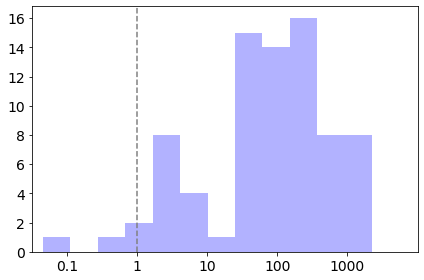

In [29]:
Rx = df_MkMpnonzero["Rx (mcmc)"].mean()
Ry = df_MkMpnonzero["Ry (mcmc)"].mean()
M0 = df_MkMpnonzero["M0 (mcmc)"].mean()

Mk_ls = []
for index, row in df_MkMpnonzero.iterrows():
    Mk_ls.append(row["M0 (mcmc)"] - (row["Ry (mcmc)"]*row["L"]))
Mk = np.mean(Mk_ls)

plt.hist(np.log10(df_MkMpnonzero["M0 (mcmc)"].values/np.array(Mk_ls)),bins=20,color='b',alpha=0.3);
plt.xticks([-1,0,1,2,3], [0.1,1,10,100,1000],fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(0,color='grey',ls='--')
plt.xlim(-1.5,4)
plt.tight_layout()
if save_images:
    plt.savefig("fig_outputs/M0Mkratio.pdf")
plt.show()

### Small angle tests

/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/2137247500.py:32: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.scatter(x2[i],var2[i],color='#3D59AB',edgecolor='k',lw=0.5,s=100, alpha=w_M0[i]/Z[i],zorder=10)


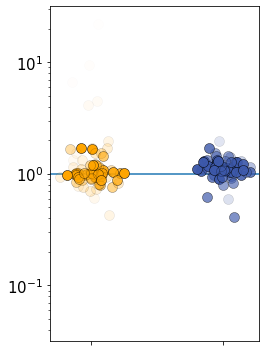

In [3]:
df = pd.read_pickle("noforce_Fx_Fy_Mp.pkl")

Rx_SA = df["Rx (small angle)"].values
M0_SA = df["M0 (small angle)"].values
Ry_SA = df["Ry (small angle)"].values

Rx_exact = df["Rx (mcmc)"].values
M0_exact = df["M0 (mcmc)"].values
Ry_exact = df["Ry (mcmc)"].values

L = df["L"].values
y = df["y (mcmc)"].values
y_max = np.array([np.max(elem) for elem in y])

w_Rx = np.abs(Rx_exact*y_max)
w_M0 = np.abs(M0_exact)
Z = (w_Rx + w_M0)

plt.figure(figsize=(3.8,5))

var1 = Rx_SA/Rx_exact
var2 = M0_SA/M0_exact

seed = 4
np.random.seed(seed)
x1 = np.random.normal(0.5,0.1,len(var1))
x2 = np.random.normal(1.5,0.1,len(var2))

plt.yscale("log")
for i in range(len(var1)):
    plt.scatter(x1[i],var1[i],color="orange",edgecolor='k',lw=0.5, s=100, alpha=w_Rx[i]/Z[i],zorder=10)
    plt.scatter(x2[i],var2[i],color='#3D59AB',edgecolor='k',lw=0.5,s=100, alpha=w_M0[i]/Z[i],zorder=10)

plt.yticks([1e-1, 1e0, 1e1])
plt.ylim([10**-1.5, 10**1.5])

plt.xticks([0.5,1.5], ("",""),fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.axhline(1)


plt.savefig('fig_outputs/small_vs_exact_ratios.pdf')
plt.show()

/var/folders/cp/0lclv8hx2jxbhys0zh6lh07c0000gn/T/ipykernel_3660/3847608540.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.errorbar([0,1],[np.mean(var1),np.mean(var2)],\


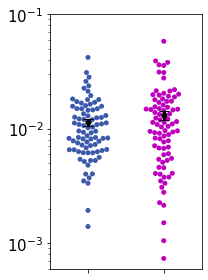

In [4]:
err_SA = df["RMSE (small angle)"].values
err_exact = df["RMSE (mcmc)"].values
diff_model_err = np.abs(err_SA - err_exact)/err_exact

plt.figure(figsize=(3,4))

var1 = err_SA
var2 = err_exact
plt.yscale("log")

sns.swarmplot(data=[var1,var2], palette = ["#3D59AB","m"], size = 5)
plt.errorbar([0,1],[np.mean(var1),np.mean(var2)],\
             yerr = [np.std(var1)/np.sqrt(len(var1)),np.std(var2)/np.sqrt(len(var2))],\
             elinewidth = 3, fmt = '_', color = 'k', marker = '.', markersize = 10, \
             capsize = 5, capthick = 1, zorder = 10)

plt.xticks([0,1], ("",""),fontsize=15)
plt.yticks([1e-3, 1e-2, 1e-1], fontsize=15)

plt.tight_layout()

plt.savefig('fig_outputs/smallangle_approx_errors.pdf')
plt.show()

In [356]:
df = pd.read_pickle("../fig2/noforce_Fx_Fy_Mp.pkl")
df_junction = pd.read_pickle("noforce_junction_fixedPx.pkl")

In [281]:
row_j["Rx (mcmc)"].values

AttributeError: 'float' object has no attribute 'values'

20180622_cell015 0 [0.33437027] [0.34663269]
RMSE 0.005272252788954623 1.3003835067895693
Rx -0.2634597228895078 -0.2634597228895078
Ry 0.03708557013689233 -0.0004838287714663374
xJ pos 0.9085426261935579
6.825135278352759 7.512179485675246 0.9085426261935579
K -0.02568543137247551 -0.009829957439763061


20180622_cell026 0 [0.37952715] [0.40529371]
RMSE 0.014584648661996415 0.4555757382091202
Rx -0.0703966622991541 -0.0703966622991541
Ry 0.047645605289460255 -0.0004079821259138569
xJ pos 0.9115136696671551
5.229619777586309 5.737291662884153 0.9115136696671551
K -0.007004322351540249 -0.009869814754624064


20180626_cell001 2 [0.39641736] [0.41062934]
RMSE 0.014733772897097567 0.38549924340922737
Rx -0.004585671806445172 -0.004585671806445172
Ry 0.04055629442490862 -0.0004098655792883314
xJ pos 0.9143331482856277
6.340681549485023 6.934760662865373 0.9143331482856277
K -0.000579220905352203 -0.009716992195533757


20180628_cell006 1 [0.36406058] [0.38991168]
RMSE 0.021963571792145337 

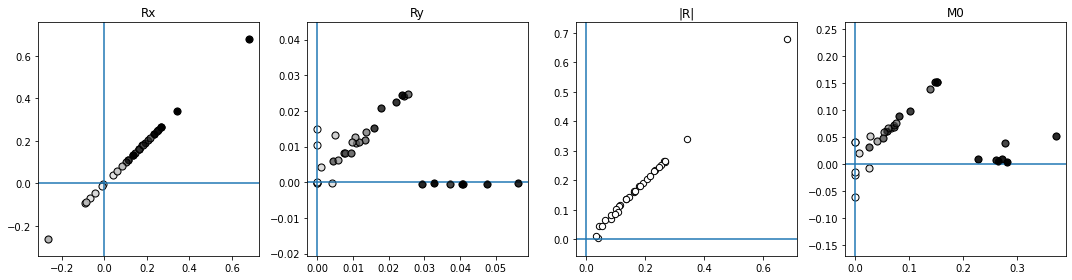

In [366]:
fig, ax = plt.subplots(1, 4, figsize = (15, 4))

RMSE,RMSE_j = [],[]
R_ratio, R_ls,Rx_ls,Ry_ls, M0_ls, R_jls,Rx_jls,Ry_jls, M0_jls = [],[],[],[],[],[],[],[],[]
Rx_testset,RMSE_testset, xj_testset = [],[],[]
Kx_testset, Jx_testset, Jy_testset = [],[],[]
xj_ls = []

for index, row_j in df_junction.iterrows():
    spindle = row_j["Spindle"]
    kfiber = row_j["Kfiber"]
    row = df.loc[(df['Spindle'] == spindle) & (df['Kfiber'] == kfiber)]

    #calculating weights
    L = row_j["L"]
#     print(L)
    y_mod = row["y (mcmc)"].values[0]
    x_mod = row["x (mcmc)"].values[0]
    y_max = max(y_mod)
#     print(y_max,np.max(y[0]))
    w_Rx = np.abs(row["Rx (mcmc)"].values[0]*y_max)
    w_M0 = np.abs(row["M0 (mcmc)"].values[0])
    Z = (w_Rx + w_M0)

    y_dat = row["y_dat"].values[0]
    x_dat = row["x_dat"].values[0]
    x_peak_dat = x_dat[np.where(y_dat == np.max(y_dat))[0]]
    x_peak_mod = x_mod[np.where(y_mod == np.max(y_mod))[0]]
#     print(x_peak_dat/L,x_peak_mod/L)
#     print("xJ pos", row_j["xj"]/L)
#     print(row_j["xj"],L,row_j["xj"]/L)
    xj_ls.append(row_j["xj"]/L)
    
    if row["Ry (mcmc)"].values[0] > 0.028:
        RMSE_testset.append(row["RMSE (mcmc)"].values)
        Rx_testset.append(row["Rx (mcmc)"].values)
        print(spindle,kfiber,x_peak_dat/L,x_peak_mod/L)
        print("RMSE", row["RMSE (mcmc)"].values[0], row_j["RMSE (mcmc)"])
        print("Rx", row["Rx (mcmc)"].values[0], row_j["Px (input)"])
        print("Ry", row["Ry (mcmc)"].values[0], row_j["Py (mcmc)"])
        print("xJ pos", row_j["xj"]/L)
        xj_testset.append(row_j["xj"]/L)
        Kx_testset.append(row_j["Kx (mcmc)"])
        Jx_testset.append(row_j["Jx (mcmc)"])
        Jy_testset.append(row_j["Jy (mcmc)"])
        print(row_j["xj"],L,row_j["xj"]/L)
        print("K", row_j["Kx (mcmc)"],row_j["Ky (mcmc)"])
        print("\n")


    RMSE.append(row["RMSE (mcmc)"].values[0])
    RMSE_j.append(row_j["RMSE (mcmc)"])
    ax[0].set_title("Rx")
    ax[1].set_title("Ry")
    ax[2].set_title("|R|")
    ax[3].set_title("M0")
#     if (row["Rx (mcmc)"].values < 0) and (row_j["Rx (mcmc)"] < 0):
#         continue

    R = np.sqrt(row["Rx (mcmc)"].values[0]**2 + row["Ry (mcmc)"].values[0]**2)
    R_j = np.sqrt(row_j["Px (input)"]**2 + row_j["Py (mcmc)"]**2)

    ax[0].scatter(row["Rx (mcmc)"],row_j["Px (input)"],c='w',s=50, alpha=1,edgecolor='k')
    ax[0].scatter(row["Rx (mcmc)"],row_j["Px (input)"],c='k',s=40, alpha=w_Rx/Z,zorder=10)
    ax[1].scatter(row["Ry (mcmc)"],row_j["Py (mcmc)"],c='w',s=50, alpha=1,edgecolor='k')
    ax[1].scatter(row["Ry (mcmc)"],row_j["Py (mcmc)"],c='k',s=40, alpha=w_M0/Z,zorder=10)
    ax[3].scatter(row["M0 (mcmc)"],row_j["M0 (mcmc)"],c='w',s=50, alpha=1,edgecolor='k')
    ax[3].scatter(row["M0 (mcmc)"],row_j["M0 (mcmc)"],c='k',s=40, alpha=w_M0/Z,zorder=10)
    ax[2].scatter(R,R_j,c='w',s=40, alpha=1,edgecolor='k')

#     ax[0].scatter(np.abs(row["Rx (mcmc)"]),np.abs(row_j["Rx (mcmc)"]),c='w',s=50, alpha=1,edgecolor='k')
#     ax[0].scatter(np.abs(row["Rx (mcmc)"]),np.abs(row_j["Rx (mcmc)"]),c='k',s=40, alpha=w_Rx/Z,zorder=10)
#     ax[1].scatter(np.abs(row["Ry (mcmc)"]),np.abs(row_j["Ry (mcmc)"]),c='w',s=50, alpha=1,edgecolor='k')
#     ax[1].scatter(np.abs(row["Ry (mcmc)"]),np.abs(row_j["Ry (mcmc)"]),c='k',s=40, alpha=w_M0/Z,zorder=10)
#     ax[2].scatter(R,R_j,c='w',s=40, alpha=1,edgecolor='k')
#     ax[3].scatter(np.abs(row["M0 (mcmc)"]),np.abs(row_j["M0 (mcmc)"]),c='w',s=50, alpha=1,edgecolor='k')
#     ax[3].scatter(np.abs(row["M0 (mcmc)"]),np.abs(row_j["M0 (mcmc)"]),c='k',s=40, alpha=w_M0/Z,zorder=10)

    R_ratio.append(R/R_j)
    Rx_ls.append(row["Rx (mcmc)"].values[0])
    Ry_ls.append(row["Ry (mcmc)"].values[0])
    R_ls.append(R)
    M0_ls.append(row["M0 (mcmc)"].values[0])   
    Rx_jls.append(row_j["Px (input)"])
    Ry_jls.append(row_j["Py (mcmc)"])
    R_jls.append(R_j)
    M0_jls.append(row_j["M0 (mcmc)"])   

for i in range(4):
#     ax[i].set_xscale("log")
#     ax[i].set_yscale("log")
#     ax[i].plot([0.001,0.7],[0.001,0.7])
    ax[i].axhline(0)
    ax[i].axvline(0)
    ax[i].axis("equal")
# plt.xlabel("df")
# plt.ylabel("df_j")
plt.tight_layout()
plt.show()


L = df["L"].values
y = df["y (mcmc)"].values
y_max = np.array([np.max(elem) for elem in y])



In [328]:
len(df_junction["Jy (mcmc)"])

32

(array([5., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.04982518, 0.13595054, 0.2220759 , 0.30820125, 0.39432661,
        0.48045197, 0.56657733, 0.65270268, 0.73882804, 0.8249534 ,
        0.91107876]),
 <a list of 10 Patch objects>)

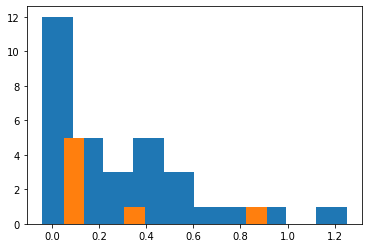

In [324]:
plt.hist(df_junction["Jy (mcmc)"])
plt.hist(Jy_testset)

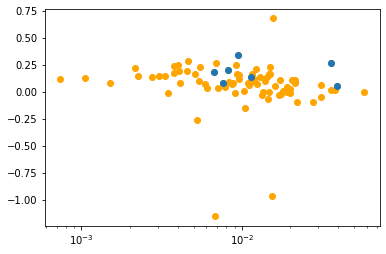

In [274]:
plt.scatter(df["RMSE (mcmc)"].values,df["Rx (mcmc)"].values,color="orange")
# plt.show()

plt.scatter(RMSE_testset,Rx_testset)
plt.xscale("log")
# print(len(RMSE),len(Rx_ls))

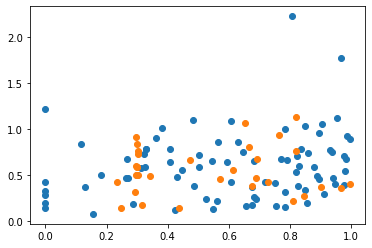

In [241]:
df = pd.read_pickle("noforce_Fx_Fy_Mp.pkl")

Rx_exact = df["Rx (mcmc)"].values
M0_exact = df["M0 (mcmc)"].values

L = df["L"].values
y = df["y (mcmc)"].values
y_max = np.array([np.max(elem) for elem in y])

w_Rx = np.abs(Rx_exact*y_max)
w_M0 = np.abs(M0_exact)
Z = (w_Rx + w_M0)

plt.scatter(w_M0/Z, y_max)

Rx_exact = df_junction["Rx (mcmc)"].values
M0_exact = df_junction["M0 (mcmc)"].values

L = df_junction["L"].values
y = df_junction["y (mcmc)"].values
y_max = np.array([np.max(elem) for elem in y])

w_Rx = np.abs(Rx_exact*y_max)
w_M0 = np.abs(M0_exact)
Z = (w_Rx + w_M0)

plt.scatter(w_M0/Z, y_max)

plt.show()


In [217]:
from scipy.stats import mannwhitneyu
# print("mann-whitney U test")
print("R", mannwhitneyu(R_ls, R_jls, alternative='two-sided')[1])
pearsonr = scipy.stats.pearsonr(R_ls, R_jls)
print(pearsonr[0]**2,pearsonr[1])
print("Rx", mannwhitneyu(Rx_ls, Rx_jls, alternative='two-sided')[1])
pearsonr = scipy.stats.pearsonr(Rx_ls, Rx_jls)
print(pearsonr[0]**2,pearsonr[1])
print("Ry", mannwhitneyu(Ry_ls, Ry_jls, alternative='two-sided')[1])
pearsonr = scipy.stats.pearsonr(Ry_ls, Ry_jls)
print(pearsonr[0]**2,pearsonr[1])
print("M0", mannwhitneyu(M0_ls, M0_jls, alternative='two-sided')[1])
pearsonr = scipy.stats.pearsonr(M0_ls, M0_jls)
print(pearsonr[0]**2,pearsonr[1])


R 0.11009878371155198
0.4271459982092592 0.0032656621522363545
Rx 0.11009878371155198
0.42724040320400897 0.0032610709271260695
Ry 0.5583365375081784
0.5736020575958842 0.00027276498995386535
M0 0.7159745798891979
0.6274756144545383 8.915328560928826e-05


0.11222917487500754 0.24510275258042236 0.4578862280960441
0.1355741692888868 0.0003686787865009311 367.7297806461788
0.11226621823477692 0.13092074092940265 0.8575128542490839
0.2654102403671079 0.00031208146819983185 850.4517807419458
0.038298436862251116 0.1612602831911215 0.23749454053023583
0.16184471373953352 0.6492637895038627 0.2492742031142808
-0.2634597228895078 0.00024931671442746106 -1056.727077021391
0.1784240108050524 0.21209743863066155 0.8412360467763744
0.23401001075929057 0.18384053714684878 1.272896687482844
-0.0703966622991541 0.00029741611555234027 -236.6941756616597
0.1922109723678969 0.19777211364473657 0.9718810646538909
0.20517265342616345 0.0004764700620789597 430.6097481359965
0.16335547097834413 0.12117880272467207 1.3480531850896467
0.06042514844448028 0.08890741353711792 0.6796412811992715
0.25296841077483223 0.21725122333152558 1.1644050003290531
0.10151399219474774 0.14854572707081104 0.6833854746044395
-0.004585671806445172 0.07471031553160246 -0.061379

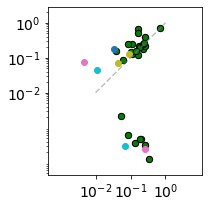

In [199]:
plt.figure(figsize=(3,3))
for index, row_j in df_junction.iterrows():
    spindle = row_j["Spindle"]
    kfiber = row_j["Kfiber"]
    
    row = df.loc[(df['Spindle'] == spindle) & (df['Kfiber'] == kfiber)]

    #calculating weights
    L = row["L"].values
    y = row["y (mcmc)"].values
    y_max = max(y)[0]
    w_Rx = np.abs(row["Rx (mcmc)"].values[0]*y_max)
    w_M0 = np.abs(row["M0 (mcmc)"].values[0])
    Z = (w_Rx + w_M0)

    R = np.sqrt(row["Rx (mcmc)"].values[0]**2 + row["Ry (mcmc)"].values[0]**2)
    R_j = np.sqrt(row_j["Rx (mcmc)"]**2 + row_j["Ry (mcmc)"]**2)
    R_ratio.append(R/R_j)

    plt.scatter(np.abs(row["Rx (mcmc)"]),np.abs(row_j["Rx (mcmc)"]))
    plt.scatter(row["Rx (mcmc)"],row_j["Rx (mcmc)"],c='green',s=40, alpha=1,edgecolor='k')
    print(row["Rx (mcmc)"].values[0], row_j["Rx (mcmc)"],  row["Rx (mcmc)"].values[0]/row_j["Rx (mcmc)"])
#     plt.scatter(np.abs(row["M0 (mcmc)"]),np.abs(row_j["M0 (mcmc)"]),c='w',s=50, alpha=1,edgecolor='k')
#     plt.scatter(np.abs(row["M0 (mcmc)"]),np.abs(row_j["M0 (mcmc)"]),c='k',s=40, alpha=w_M0/Z,zorder=10)
    
plt.xscale("log")
plt.yscale("log")
plt.plot([0.01,1],[0.01,1],color='grey', ls='--',alpha=0.5)

plt.axis("equal")
plt.xticks([1e-2,1e-1,1], fontsize=14)
plt.yticks([1e-2,1e-1,1], fontsize=14)
plt.tight_layout()
# plt.savefig("fig_outputs/junction_R_comparison.pdf")
plt.show()



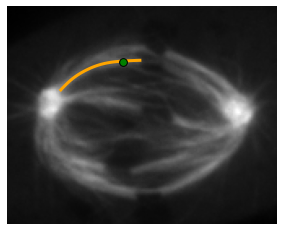

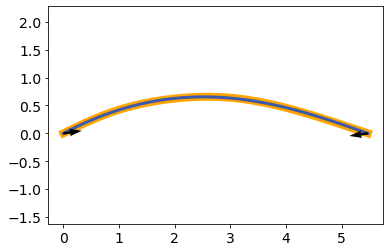

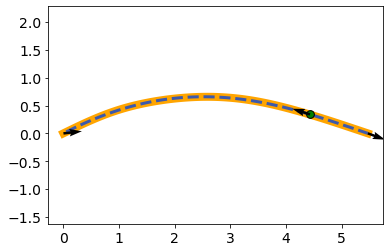

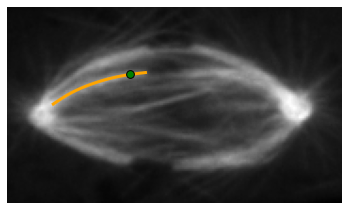

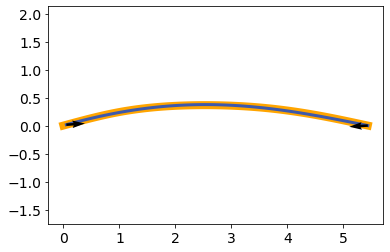

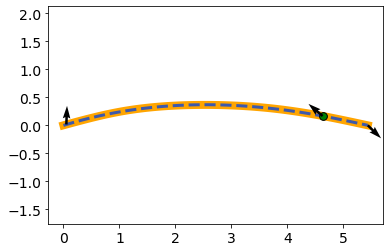

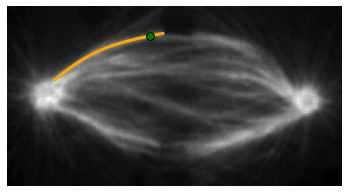

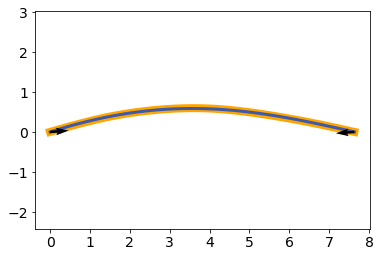

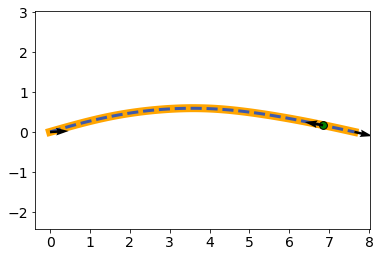

In [202]:
path = "../../dat/WT unmanipulated k-fiber shapes"

spindles = ["20180622_cell020", "20180622_cell027", "20180622_cell028"]
kfibers = ["3", "1", "0"]

for i in range(len(spindles)):
    spindle = spindles[i]
    kfiber = kfibers[i]

    df_filt = df.loc[(df['Spindle'] == spindle) & (df['Kfiber'] == kfiber)]
    df_j_filt = df_junction.loc[(df_junction['Spindle'] == spindle) & (df_junction['Kfiber'] == kfiber)]

    image = mpimg.imread("%s/%s/%s_before.tif"%(path,spindle,spindle))
    plt.imshow(image, cmap ='gray')

    df_profile = pd.read_csv("%s/%s/%s_before_%s.csv"%(path,spindle,spindle,kfiber))
    df_bridge = pd.read_csv("%s/%s/%s_before_bridge_%s.csv"%(path,spindle,spindle,kfiber))

    x_dat = np.array(df_profile["X"].values)
    y_dat = np.array(df_profile["Y"].values)
    x_bridge = df_bridge["X"].values[0]
    y_bridge = df_bridge["Y"].values[0]
    plt.plot(x_dat, y_dat, color = 'orange', lw = 3)
    plt.scatter(x_bridge, y_bridge, s=60, color = 'green', edgecolor='k',zorder=4)
    plt.axis("off")
    plt.gca().invert_yaxis()
    if i == 0:
        plt.gca().invert_xaxis()
    plt.savefig('fig_outputs/%s_%s_image.pdf'%(spindle,kfiber))
    plt.show()

    x_dat = df_filt["x_dat"].values[0]
    y_dat = df_filt["y_dat"].values[0]

    x_mod = df_filt["x (mcmc)"].values[0]
    y_mod = df_filt["y (mcmc)"].values[0]
    plt.plot(x_dat,y_dat, color = 'orange', lw = 8)
    plt.plot(x_mod,y_mod, color= "#3D59AB", lw = 3)
    plt.quiver(x_mod[0],y_mod[0], df_filt["Rx (mcmc)"].values[0], df_filt["Ry (mcmc)"].values[0],zorder=5)
    plt.quiver(x_mod[-1],y_mod[-1], -df_filt["Rx (mcmc)"].values[0], -df_filt["Ry (mcmc)"].values[0],zorder=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.axis("equal")
    plt.savefig('fig_outputs/%s_%s_mod.pdf'%(spindle,kfiber))
    plt.show()

    x_jmod = df_j_filt["x (mcmc)"].values[0]
    y_jmod = df_j_filt["y (mcmc)"].values[0]
    xj = df_j_filt["xj"].values[0]
    yj = df_j_filt["yj"].values[0]
    plt.plot(x_dat,y_dat, color = 'orange', lw = 8)
    plt.plot(x_jmod,y_jmod, color= "#3D59AB", lw = 3, ls = '--')
    plt.scatter(xj, yj, s=60, color = 'green', edgecolor='k',zorder=4)
    plt.quiver(x_mod[0],y_mod[0], df_j_filt["Rx (mcmc)"].values[0], df_j_filt["Ry (mcmc)"].values[0],zorder=5)
    plt.quiver(xj,yj, df_j_filt["Jx (mcmc)"].values[0], df_j_filt["Jy (mcmc)"].values[0],zorder=5)
    plt.quiver(x_mod[-1],y_mod[-1], df_j_filt["Kx (mcmc)"].values[0], df_j_filt["Ky (mcmc)"].values[0],zorder=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.axis("equal")
    plt.savefig('fig_outputs/%s_%s_jmod.pdf'%(spindle,kfiber))
    plt.show()


-2.4207439930885823 2.4689455436855465


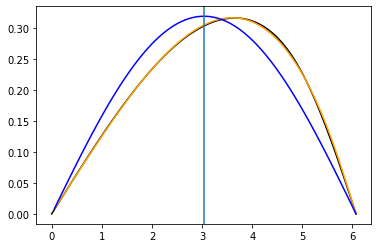

-2.4425536395534895 2.4909219067102653


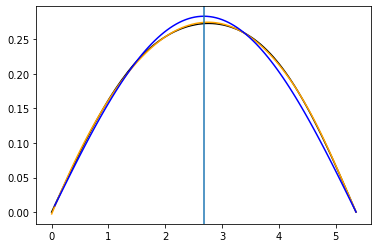

-0.0007928009595588592 0.011371888251060502


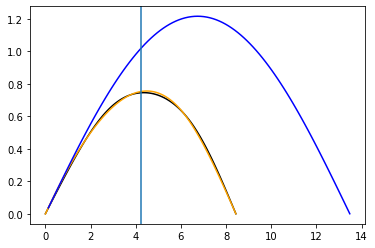

In [5]:
RMSE,RMSE_j = [],[]
R_ratio = []
for index, row_j in df_junction.iterrows():
    spindle = row_j["Spindle"]
    kfiber = row_j["Kfiber"]
    
    row = df.loc[(df['Spindle'] == spindle) & (df['Kfiber'] == kfiber)]

    #calculating weights
    L = row["L"].values
    y = row["y (mcmc)"].values
    y_max = max(y)[0]
    w_Rx = np.abs(row["Rx (mcmc)"].values[0]*y_max)
    w_M0 = np.abs(row["M0 (mcmc)"].values[0])
    Z = (w_Rx + w_M0)

    RMSE.append(row["RMSE (mcmc)"].values[0])
    RMSE_j.append(row_j["RMSE (mcmc)"])

    R = np.sqrt(row["Rx (mcmc)"].values[0]**2 + row["Ry (mcmc)"].values[0]**2)
    R_j = np.sqrt(row_j["Rx (mcmc)"]**2 + row_j["Ry (mcmc)"]**2)
    R_ratio.append(R/R_j)
    if R/R_j > 2 and w_Rx/Z > 0.5:
        print(row_j["Jx (mcmc)"],row_j["Kx (mcmc)"])
        plt.plot(row_j["x_dat"],row_j["y_dat"], color='k')
        plt.plot(row_j["x (mcmc)"],row_j["y (mcmc)"], color='orange')
        plt.plot(row["x (mcmc)"].values[0],row["y (mcmc)"].values[0], color='blue')
#         plt.axis("equal")
        plt.axvline(row_j["x_dat"][-1]/2)
        plt.show()


L = df["L"].values
y = df["y (mcmc)"].values
y_max = np.array([np.max(elem) for elem in y])



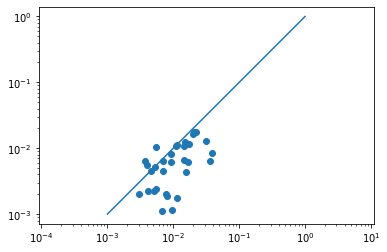

In [17]:
plt.scatter(RMSE,RMSE_j)
plt.axis('equal')
plt.xscale('log')
plt.yscale('log')
plt.plot([1e-3, 1], [1e-3, 1])

<ErrorbarContainer object of 3 artists>

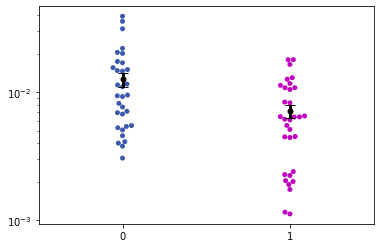

In [40]:
plt.yscale("log")
var1 = np.array(RMSE)
var2 = np.array(RMSE_j)
sns.swarmplot(data=[var1,var2], palette = ["#3D59AB","m"], size = 5)
plt.errorbar([0,1],[np.mean(var1),np.mean(var2)],\
             yerr = [np.std(var1)/np.sqrt(len(var1)),np.std(var2)/np.sqrt(len(var2))],\
             elinewidth = 3, fmt = '_', color = 'k', marker = '.', markersize = 10, \
             capsize = 5, capthick = 1, zorder = 10)


junction dataset n =  32


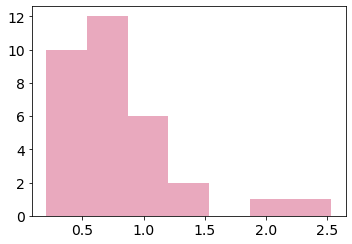

In [15]:
junc_k_dist = []
plt.figure(figsize=(5,3.5))
for index, row_j in df_junction.iterrows():
    res, indices = distances_pair_min(np.array([row_j["xj"]]), np.array([row_j["yj"]]),row_j["x_dat"], row_j["y_dat"])
    ind = int(indices[0])
    s_dat,_ = contour_fn(row_j["x_dat"], row_j["y_dat"])
    s_dat = s_dat[ind::] - s_dat[ind]
    junc_k_dist.append(s_dat[-1])
print("junction dataset n = ", len(junc_k_dist))
plt.hist(junc_k_dist, 7, color='palevioletred',alpha=0.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("fig_outputs/junction_hist.pdf")
plt.show()


-2.4439711097353953 -0.0042902325026928055 -1.345387311084063


(array([6., 3., 3., 2., 5., 0., 1., 0., 3., 9.]),
 array([-2.44397111, -2.20000302, -1.95603493, -1.71206685, -1.46809876,
        -1.22413067, -0.98016258, -0.7361945 , -0.49222641, -0.24825832,
        -0.00429023]),
 <a list of 10 Patch objects>)

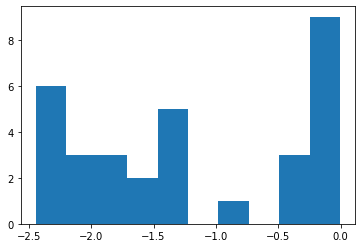

In [201]:
print(df_junction["Jx (mcmc)"].min(),df_junction["Jx (mcmc)"].max(),df_junction["Jx (mcmc)"].median())
plt.hist(df_junction["Jx (mcmc)"])


In [227]:
np.array(Rx_ls)<0
# plt.hist(Rx_ls)

array([ 0.11222917,  0.13557417,  0.11226622,  0.26541024,  0.03829844,
        0.16184471, -0.26345972,  0.17842401,  0.23401001, -0.07039666,
        0.19221097,  0.20517265,  0.16335547,  0.06042515,  0.25296841,
        0.10151399, -0.00458567,  0.14468669, -0.09280402, -0.01134006,
        0.230969  ,  0.34026553,  0.08250385,  0.16372915,  0.67999799,
        0.2459536 ,  0.26660912,  0.18148503, -0.04527001,  0.05273718,
       -0.03359426,  0.085627  ])

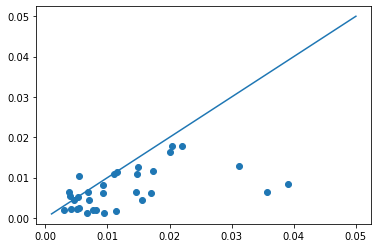

In [162]:
plt.scatter(RMSE,RMSE_j)
plt.plot([0.001,0.05],[0.001,0.05])

(array([2., 1., 1., 2., 2., 0., 2., 1., 0., 1.]),
 array([ 4.13036256,  7.63619321, 11.14202386, 14.64785451, 18.15368515,
        21.6595158 , 25.16534645, 28.6711771 , 32.17700775, 35.6828384 ,
        39.18866905]),
 <a list of 10 Patch objects>)

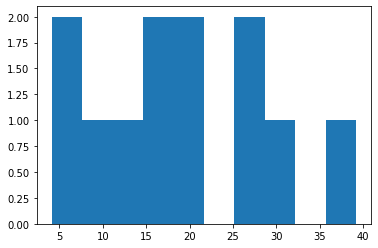

In [345]:
df_Fc = pd.read_pickle("../fig5/force_FC.pkl")
plt.hist(np.degrees(df_Fc["theta0 (exact)"].values))    
# df_Fc.head()

20171215_cell004a 5.105067623904119


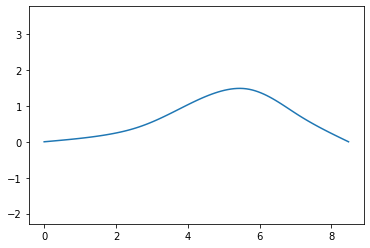

20171215_cell004b 16.861533473845682


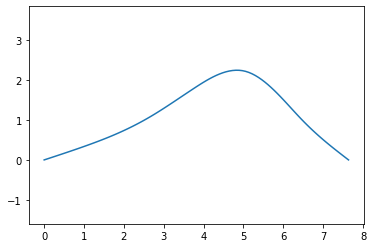

20180611_cell002 20.504546310800826


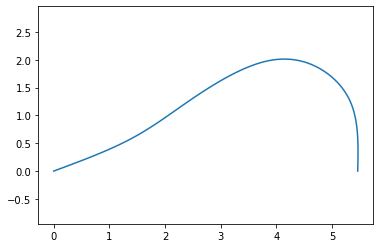

20180620_cell013 10.28722679831377


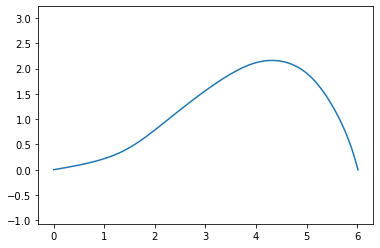

20180622_cell016 26.19914922384584


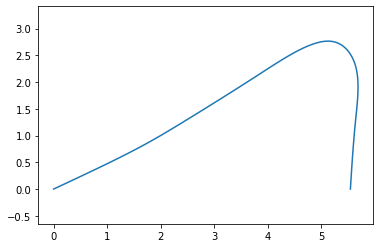

20180622_cell020 15.146538783965003


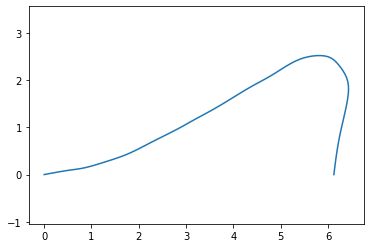

20180622_cell031 4.130362557799256


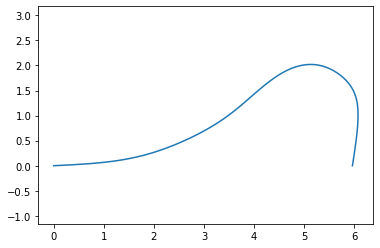

20180628_cell002 12.683577103791121


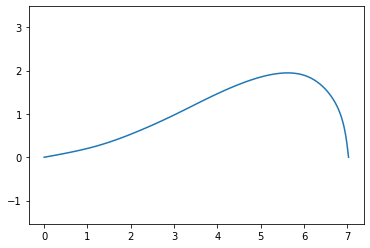

20180628_cell010 19.27356721544934


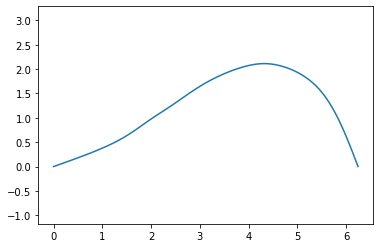

20180926_cell007 26.29937239487045


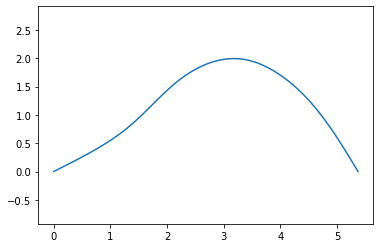

20190110_cell008 39.18866904895412


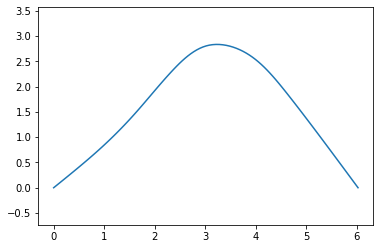

20190927_cell008 30.35656567714997


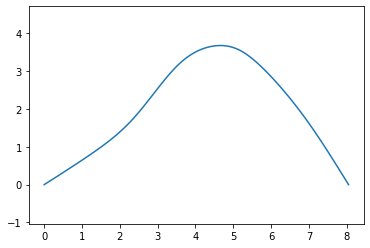

In [355]:
for index, row in df_Fc.iterrows():
    print(row["Spindle"], np.degrees(row["theta0 (exact)"]))
    plt.plot(row["x_dat"],row["y_dat"])
    plt.axis("equal")
    plt.show()
    